# Stat HW week 11

## Chat Bot Log: [LINK](https://chatgpt.com/share/673fea0b-c69c-8006-889e-47c0b5f3d135) [LINK 2](https://chatgpt.com/share/673ff133-2864-8006-bc56-64f303280d20)

### 1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

##### a) Problems Classification Decision Trees Handle Problem Type:

 - Classification problems: 
    - Predict "Yes/No," "Red/Blue, and "High/Medium/Low" are all examples of categorical outcomes.
    - Regression trees are used to handle regression problems, which forecast continuous numerical results.
    
- Some Examples of Real-World Applications:
    1. Healthcare: Diagnose diseases based on symptoms. For example, identify patients as diabetic: Yes/No
    2. Finance: Loan Approval: A loan application can be assigned a classification of "Approved" or "Denied.".
    3. Marketing: Categorization of customers into "High Value" and "Low Value", for instance.
    4. Email filtering which categorizes emails into "Spam" and "Not Spam".

##### (b) Decision Trees vs. Multiple Linear Regression
- How a Decision Tree Makes Predictions:

    1. Structure: 
        - A tree-like model that consists of nodes and branches.
        - Each node represents a decision rule involving feature values.
        - Each branch represents the outcome of the decision rule.
        - The leaf nodes represent the final classification.
        
    2. How to Predict:
        - At the root node of the tree, the first condition will be something like "Age > 50?".
        - Move onto the next node, based on which branch is taken depending upon the outcome of the condition.
        - Until you reach a leaf node that gives you an expected class label.
        
    3. One of the key characteristics: 
        - It does sequential, rule-based decisions in the form of
        - Splits are automatically handled: Each split depends on the previous splits.
        - Can handle categorical and numerical variables.

- The Prediction Process of Multiple Linear Regression:
    - Organization:
        - A linear model, or mathematical equation: 
            - The formula is Y=β0 +β1 X 1 +β2 X 2 + ... +βp Xp +ϵ. representing a linear model.
            - Coefficients β represent the relationship between predictors, the X's, and the target, Y.
    - Predictive Approach:
        - To determine a predicted result, enter feature values into the formula.
        - forecasts a continuous value rather than a categorical result.
    - Important attributes:
        - assumes that the predictors and the target have linear relationships.
        - does not manage interactions by default unless they are specifically modeled (e.g., interaction terms).

##### Summary of Key Differences:

In [3]:
import pandas as pd

# Data for the table
data = {
    "Aspect": ["Type of Prediction", "Prediction Mechanism", "Model Interactions", "Complexity"],
    "Classification Decision Tree": [
        "Categorical", 
        "Sequential rules (tree traversal)", 
        "Implicit through tree structure", 
        "Can model complex, nonlinear patterns"
    ],
    "Multiple Linear Regression": [
        "Continuous", 
        "Linear combination of features", 
        "Explicit (need interaction terms)", 
        "Limited to linear relationships"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
from IPython.display import display
display(df)

,Aspect,Classification Decision Tree,Multiple Linear Regression
0,Type of Prediction,Categorical,Continuous
1,Prediction Mechanism,Sequential rules (tree traversal),Linear combination of features
2,Model Interactions,Implicit through tree structure,Explicit (need interaction terms)
3,Complexity,"Can model complex, nonlinear patterns",Limited to linear relationships


###### Summary Visualization:
- A decision tree is like a flowchart: at each step, you ask a question about the input data, and follow the appropriate branch down, until you get to the prediction.
- A linear regression model is analogous to an equation whereby one obtains the output through entry of the inputs.

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

1. Accuracy

- Application Scenario: Quality Control in Manufacturing

    - Accuracy is a proper metric in a manufacturing setting where there are products being inspected for defects. For a manufacturing setting, the defect rate is fairly consistent, and the cost of a misclassified defective item or a misclassified non-defective item has a similar cost. Accuracy measures the total of correct predictions, both true positive and true negative. If the classes are balanced, then the error carried by them will also be equal, so a clear picture can be obtained from the model's performance.

2. Sensitivity

- Application Scenario: Disease Screening Tests

    - Sensitivity is crucial in medical screenings for serious conditions like cancer or infectious diseases. It measures the proportion of actual positive cases correctly identified. A high sensitivity means that most patients who have the disease are correctly detected, minimizing the number of false negatives. This is vital because missing a true case could delay treatment and worsen patient outcomes.



3. Specificity

- Application Scenario: Confirmatory Medical Diagnostics

    - Specificity is highly relevant in confirmatory diagnostic tests where confirmation of the absence of a condition is crucial, such as confirmatory tests for HIV. It is a measure of the proportion of actual negatives correctly identified. High specificity guarantees that no healthy individual will be falsely diagnosed with a disease, thus avoiding stress and possible superfluous treatment due to false positives.


4. Precision

- Application Scenario: Email Spam Filtering

    - Explanation: In spam detection systems, precision is key because it measures the proportion of predicted spam emails that are actually spam. High precision means that most emails flagged as spam are indeed unwanted, reducing the risk of important legitimate emails being mislabeled and potentially missed by the user. This enhances user trust in the spam filter's effectiveness.

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocessing the dataset

# 1. Remove 'Weight_oz', 'Width', and 'Height' columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab = ab.drop(columns=columns_to_remove, errors='ignore')

# 2. Drop rows with NaN entries
ab = ab.dropna()

# 3. Set 'Pub year' and 'NumPages' to type 'int'
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)

# 4. Set 'Hard_or_Paper' to type 'category'
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Save the preprocessed data for future use (if needed)
ab_reduced_noNaN = ab.copy()

# Display the first few rows of the cleaned dataset to confirm changes
ab_reduced_noNaN.head()


,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4


### 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

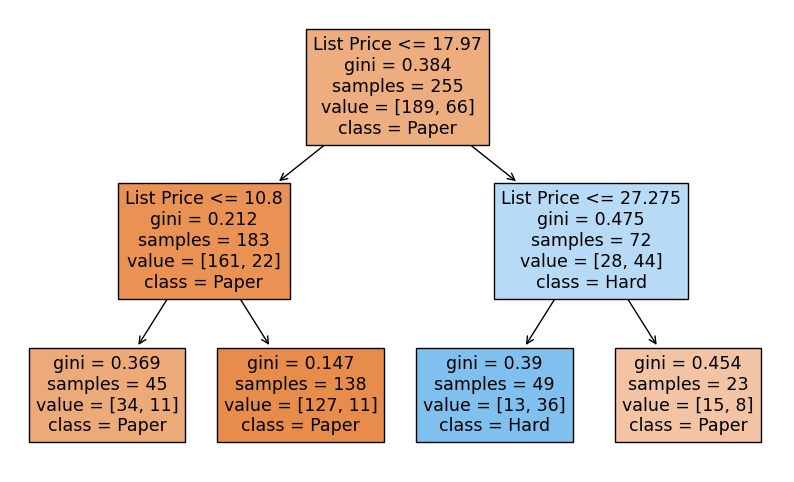

(255, 64)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Splitting the dataset into training (80%) and testing (20%) sets with a random seed for reproducibility
random_seed = 42
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=random_seed
)

# Reporting the number of observations in each dataset
train_size = ab_reduced_noNaN_train.shape[0]
test_size = ab_reduced_noNaN_test.shape[0]

# Setting up the data for DecisionTreeClassifier
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

# Training the Decision Tree Classifier with a max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=random_seed)
clf.fit(X, y)

# Visualizing the fitted tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()

# Displaying the train and test sizes
train_size, test_size

### Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

1. Preparation of Feature(s) (X) and Target Variable (y)
    - y (target variable): The binary variable Hard_or_Paper is transformed to numeric format by using pd.get_dummies(.). More specifically, the 'H' column, meaning Hardcover, is selected. 
        - The value 1 means Hardcover.
        - The value 0 means Paperback.
    - X (feature): It's a univariate model because only the column 'List Price' is used.    

2. Splitting the Dataset
    - Use 80/20 split: 
        - Use 80% to train the model on ab_reduced_noNaN_train.
        - The rest 20% is held out for testing for generalization performance evaluation for ab_reduced_noNaN_test.
- A random seed ensures reproducibility, in other words, the splits are consistent across runs.

3. Decision Tree Model Adaptation: 
    - Model Instantiation: 
        - To avoid overfitting and to maintain interpretability, DecisionTreeClassifier(max_depth=2) creates a decision tree that is only two splits deep.

    - Training Models: .fit(X, y): 
        - The following will train the decision rules for splitting the data using "List Price" to classify books as hardcover or paperback.
        - The tree decides on 'List Price' thresholds for optimal class separation.

4. Visualising the Tree
    - tree.plot_tree(.) generates a graphical representation of the fitted decision tree
    - Each node shows:
        - Condition : "List Price" is used in the decision rule
        - Samples: The number of observations associated with the node
        - Class: The predicted class at that node
        - Proportions: The class distribution at that node
    - A fancier tree visualization which provides clearer decision thresholds and predicted classes is given by Graphviz.

##### Why Use ab_reduced_noNaN_train for Training?
- Training Data (ab_reduced_noNaN_train):

    - To learn the decision rules, the model should be fitted.
    - The model learns patterns in a controlled environment by being fitted on training data.
- Testing Data (ab_reduced_noNaN_test):

    - This assures that the model generalizes well and does not overfit.
    - Used in obtaining the performance of the model on unseen data.
##### Interpretation of the Fitted Tree:
- The ranges of 'List Price' are split by the decision tree, depending on a threshold learned at training time.
- At Each Node:
    - If some condition is true (for instance, List Price ≤ 25), then the data flows down the left branch.
    - Otherwise, it flows down the right branch.
- The leaf nodes represent the final predictions:
    - Example: "If List Price ≤ 25, classify as Paperback.
Distribution of Hardcover versus Paperback samples explains the confidence in each prediction.

### 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

Accuracy of the Decision Tree Classifier: 0.859375

Classification Report:
               precision    recall  f1-score   support

           H       0.79      0.75      0.77        20
           P       0.89      0.91      0.90        44

    accuracy                           0.86        64
   macro avg       0.84      0.83      0.83        64
weighted avg       0.86      0.86      0.86        64



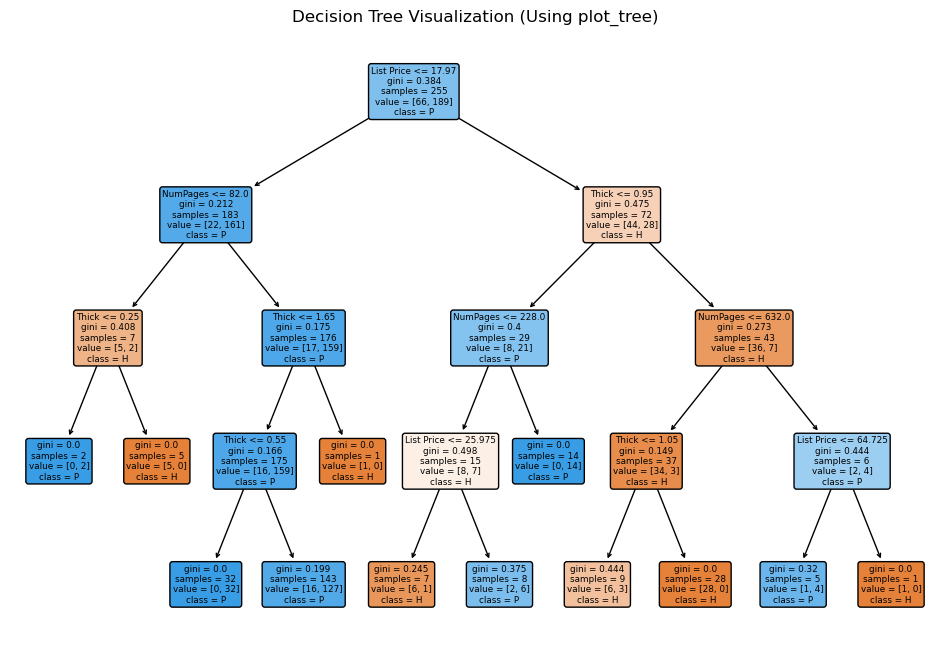

In [21]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import graphviz

# Define predictor variables (X) and target variable (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = ab_reduced_noNaN['Hard_or_Paper']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Predict on the test set
y_pred = clf2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree Classifier:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision tree using graphviz
dot_data = tree.export_graphviz(
    clf2, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=y.cat.categories, 
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)  # Save the tree as PNG
graph  # Display the tree in the notebook

# Optional visualization using plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(clf2, feature_names=X.columns, class_names=y.cat.categories, filled=True, rounded=True)
plt.title("Decision Tree Visualization (Using plot_tree)")
plt.show()


#### Explanation of Predictions for clf2 Model
1. How the Decision Tree Works:

    - The decision tree splits the data based on values of NumPages, Thick, and List Price.
    - At each split, the tree checks one of the predictor variables and divides the data along that axis into two groups that minimize the classification error - impurity - in each branch.
    - The tree keeps doing this until it has reached a maximum depth (in this case, 4) or the leaves contain pure classifications.
2. Predicting Process:

- To predict whether a book is hardcover or paperback:
    - From the root of this tree, the model assessed conditions, at the root, on NumPages, Thick, or List Price.
    - This model moves down the branches based on the condition to reach a leaf node.
    - The leaf node contains the predicted class, hardcover or paperback, for that set of feature conditions.
3. Benefits of max_depth Setting:
    - The max_depth can prevent overfitting because it would limit the complexity of the tree.
    - A depth of 4 generalizes better on data that is unseen.

#### Steps to Perform:
1. Run above code in Jupyter Notebook.
2. Check the accuracy and classification report to assess the model's performance.
3. Open in a viewer the decision_tree.png produced by Graphviz to see a readable representation of this tree.

### 6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

Metrics for clf:
Sensitivity (Recall): 0.9090909090909091
Specificity: 0.8
Accuracy: 0.875
Confusion Matrix for clf:
[[16  4]
 [ 4 40]]

Metrics for clf2:
Sensitivity (Recall): 0.9090909090909091
Specificity: 0.75
Accuracy: 0.859375
Confusion Matrix for clf2:
[[15  5]
 [ 4 40]]


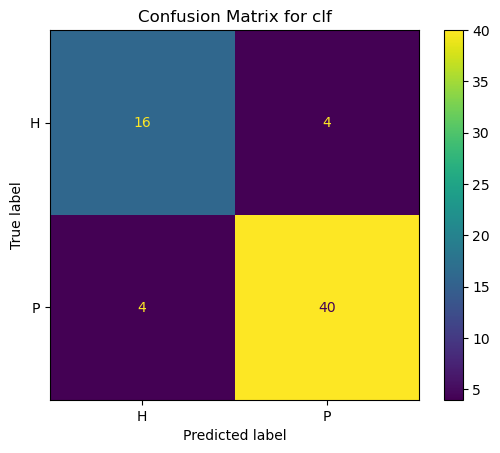

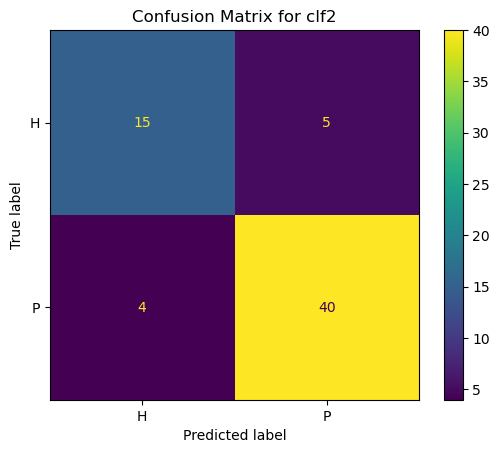

In [27]:
# Rebuild feature matrices to ensure consistency
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = ab_reduced_noNaN['Hard_or_Paper']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the models again if necessary (ensure training uses the same features)
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

# Predictions for clf and clf2
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Evaluate performance for clf
sensitivity_clf, specificity_clf, accuracy_clf, cm_clf = calculate_metrics(y_test, y_pred_clf)
print("Metrics for clf:")
print("Sensitivity (Recall):", sensitivity_clf)
print("Specificity:", specificity_clf)
print("Accuracy:", accuracy_clf)
print("Confusion Matrix for clf:")
print(cm_clf)

# Evaluate performance for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2, cm_clf2 = calculate_metrics(y_test, y_pred_clf2)
print("\nMetrics for clf2:")
print("Sensitivity (Recall):", sensitivity_clf2)
print("Specificity:", specificity_clf2)
print("Accuracy:", accuracy_clf2)
print("Confusion Matrix for clf2:")
print(cm_clf2)

# Optional: Plot confusion matrices
ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for clf")
plt.show()

ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=clf2.classes_).plot()
plt.title("Confusion Matrix for clf2")
plt.show()


### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

- These differences between the two confusion matrices are due to the varying model complexities and structure that have been used to make the predictions. The first confusion matrix most probably was from a model that had a deeper tree-or less constrained-that it managed to fit more closely to the data it trained on but may overfit and generalize poorly to unseen data. The second confusion matrix is for clf2, with a tree constrained by a max_depth of 4. This makes it less complex, thereby avoiding overfitting and generalizing better, which should provide improved performance on test data.

- The models clf and clf2 have better confusion matrices since they are models that balance fitting the training data while maintaining generalization on unseen data. A constrained depth, such as in clf2, would keep the model from memorizing the training data and would instead try to capture larger patterns, which is evident from higher test accuracy and better distribution of predictions. This will minimize false positives and negatives, thereby making those models much more reliable.

### 8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

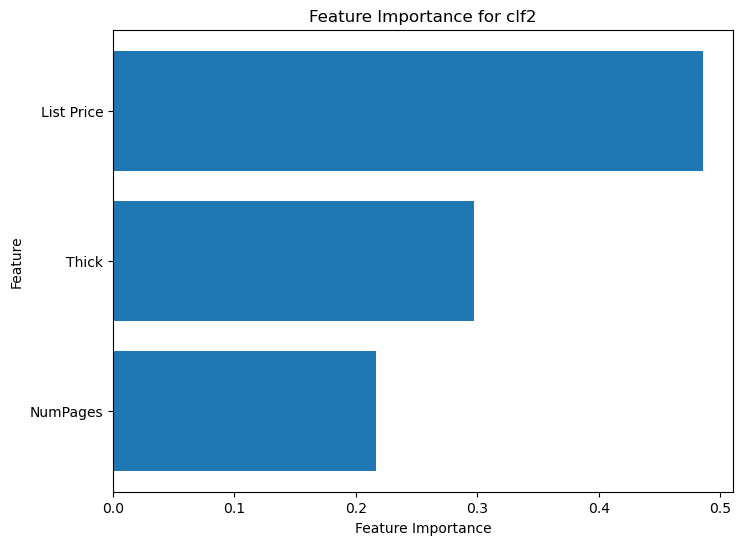

The most important feature for clf2 is: List Price


In [29]:
# Import necessary libraries for visualization
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances from clf2
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_  # Names of the features used in the tree

# Create a bar plot to visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for clf2')
plt.show()

# Identify the most important feature
most_important_feature_index = np.argmax(feature_importances)
most_important_feature = feature_names[most_important_feature_index]
print(f"The most important feature for clf2 is: {most_important_feature}")


### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

- In linear regression models, coefficients are menat to specify the amount of change in the target variable for every one-unit change in a predictor variable, while all the rest are held constant; interpretation is therefore pretty straightforward and bound directly to the relationship between input features and the outcome. By contrast, decision trees feature importance reflects the relative contribution of each feature to the model's decisions based on reductions in impurity associated with the splits involving that feature-e.g., Gini index or entropy-and the magnitude and direction of those relationships are not expressed. This makes feature importances of decision trees less interpretable in terms of direct cause-and-effect but useful to understand which features the model relies on most for its predictions.


### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

- This week was a packed week for me so never really kept a close eye on piazza discussion, though i did go over the course wiki-textbook and I’m overall satisfied with my understanding of the subject matter. hopefully the tutorial might give me more insight where i might ask a few clarification questions.